In [2]:
# Change working directory to C://Practicuum Project 2//BBCTextClassification
import os
os.chdir('C://Practicuum Project 2//BBCTextClassification/data')
print(os.getcwd())

C:\Practicuum Project 2\BBCTextClassification\data


In [3]:
# load the dataset 

import numpy as np
import pandas as pd

bbc_data=pd.read_csv('bbc-text.csv', ',')

In [4]:
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
bbc_data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [6]:
train_size = int(len(bbc_data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(bbc_data) - train_size))

Train size: 1780
Test size: 445


Data preparation
There's some work to be done in order for our data to be ready for training.

First we'll split the data into training and test sets.
Then we'll tokenize the words (text), and then convert them to a numbered index.
Next we'll do the same for the labels (categories), by using the LabelEncoder utility.
Finally, we'll convert the labels to a one-hot representation.

In [8]:
def train_test_split(data, train_size):
    train = bbc_data[:train_size]
    test = bbc_data[train_size:]
    return train, test

train, test = train_test_split(bbc_data, train_size)

train_cat=train['category']
test_cat=test['category']
train_text=train['text']
test_text=test['text']

In [9]:
from tensorflow import keras
layers = keras.layers
models = keras.models

In [16]:
max_words = 5000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words,char_level=False)

In [17]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [18]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [20]:
#tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words, char_level=False)
#tokenizer.fit_on_texts(train_text)
word_index = tokenize.word_index
dict(list(word_index.items())[0:10])

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 's': 7,
 'for': 8,
 'is': 9,
 'that': 10}

All the top words are stop words. Hence these should be removed

In [21]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [22]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
bbc_data['text_without_stopwords'] = bbc_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(bbc_data.head())

        category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                              text_without_stopwords  
0  tv future hands viewers home theatre systems p...  
1  worldcom boss left books alone former worldcom...  
2  tigers wary farrell gamble leicester say rushe...  
3  yeading face newcastle fa cup premiership side...  
4  ocean twelve raids box office ocean twelve cri...  


In [23]:
bbc_data['text_without_stopwords'] = bbc_data['text_without_stopwords'] .str.lower()

In [26]:
#from nltk.stem import PorterStemmer
#stemming = PorterStemmer()

from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemming = SnowballStemmer("english")


In [20]:
bbc_data['text_with_stemming']= [stemming.stem(word) for word in bbc_data['text_without_stopwords']]

bbc_data['text_with_stemming']= bbc_data['text_without_stopwords'].apply(lambda x: ''.join([stemmer.stem(y) for y in x])) # Stem every word.



In [27]:
def stem_sentences(sentence):
    tokens = sentence.split()
    #stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    stemmed_tokens = [stemming.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

bbc_data['text_with_stemming']= bbc_data['text_without_stopwords'].apply(stem_sentences)

In [28]:
bbc_data['text_without_stopwords'][0]

'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming. people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms a

In [29]:
bbc_data['text_with_stemming'][0]

'tv futur hand viewer home theatr system plasma high-definit tvs digit video record move live room way peopl watch tv radic differ five year time. accord expert panel gather annual consum electron show las vega discuss new technolog impact one favourit pastimes. us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devices. one talked-about technolog ces digit person video record (dvr pvr). set-top box like us tivo uk sky+ system allow peopl record store play paus forward wind tv programm want. essenti technolog allow much personalis tv. also built-in high-definit tv set big busi japan us slower take europ lack high-definit programming. peopl forward wind advert also forget abid network channel schedul put togeth a-la-cart entertainment. us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channels. although us lead technolog moment also concern rais europ particu

Some of the words above are not too meaningful

In [30]:
def train_test_split(data, train_size):
    train = bbc_data[:train_size]
    test = bbc_data[train_size:]
    return train, test

train, test = train_test_split(bbc_data, train_size)

train_cat=train['category']
test_cat=test['category']
train_text=train['text_without_stopwords']
#train_text=train['text_with_stemming']
test_text=test['text_without_stopwords']
#test_text=test['text_with_stemming']

In [31]:
max_words=5000

In [32]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False, oov_token='unknown')
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'unknown': 4721,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [33]:
tokenizer.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenizer.texts_to_matrix(train_text)
x_test = tokenizer.texts_to_matrix(test_text)

In [34]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

In [35]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [36]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [37]:
# Inspect the dimensions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 5000)
x_test shape: (445, 5000)
y_train shape: (1780, 5)
y_test shape: (445, 5)


Train the model. 
Build the model using Keras layers and hyperparameters of your choosing. Then call model.fit()

In [38]:
# Edit epoch for best results
# Training for more epochs will likely lead to overfitting on this dataset

batch_size = 32
epochs = 10
drop_ratio = 0.5


In [39]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 1602 samples, validate on 178 samples
Epoch 1/10
1602/1602 [==============================] - 1s 848us/sample - loss: 0.3284 - accuracy: 0.9082 - val_loss: 0.0701 - val_accuracy: 0.9831
Epoch 2/10
1602/1602 [==============================] - 1s 669us/sample - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0766 - val_accuracy: 0.9663
Epoch 3/10
1602/1602 [==============================] - 1s 615us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9719
Epoch 4/10
1602/1602 [==============================] - 1s 636us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 0.9719
Epoch 5/10
1602/1602 [==============================] - 1s 616us/sample - loss: 7.9034e-04 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9775
Epoch 6/10
1602/1602 [==============================] - 1s 621us/sample - loss: 6.0130e-04 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9775
Epoch 7/10
1602/1602 [==============================] - 1

Evaluate the model
Evaluation is easy. Just call model.evaluate().

In [41]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

445/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.0822115318159039
Test accuracy: 0.9752809


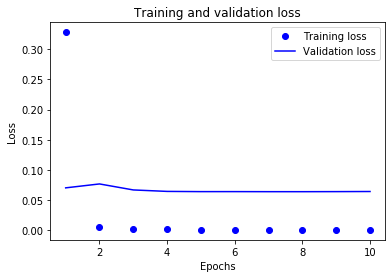

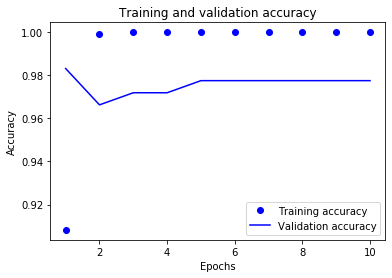

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Visualize the confusion matrix

In [46]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

Function from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

In [48]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,normalize=False
                         ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.xlim(-0.5, len(np.unique(y))-0.5)
    #plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [49]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

Confusion matrix, without normalization
[[101   1   3   0   1]
 [  0  65   0   0   1]
 [  2   1  82   0   1]
 [  0   0   0 101   0]
 [  0   1   0   0  85]]


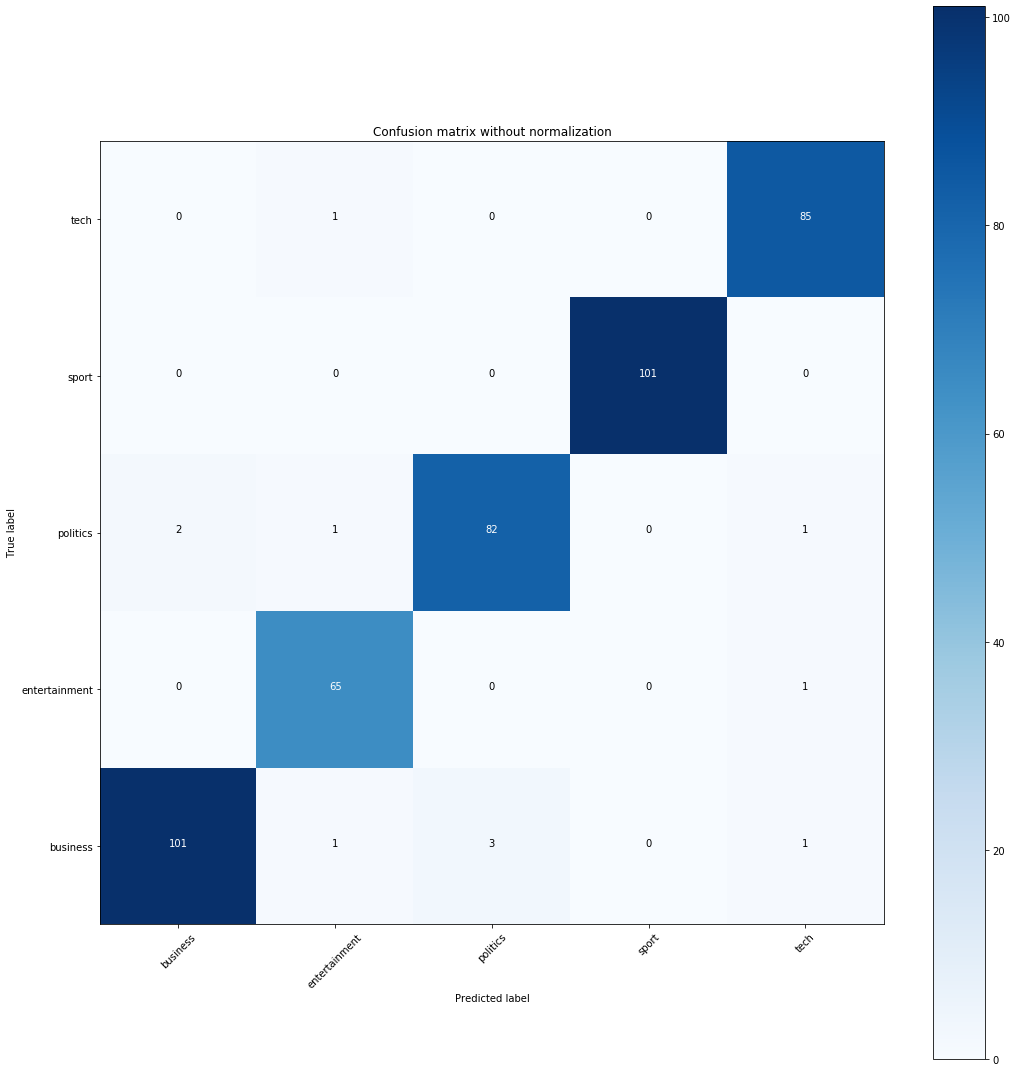

In [50]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(15,15))
plt.ylim(-0.5, 4.5)
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix without normalization",normalize=False)
plt.show()


Hyperparamter tuning:
In model:
epoch, 
batch size, 
dropout ratio, 
network structure, 
activation function, 
and others

Outside model:
reducing the max words of the call to keras.preprocessing.text.Tokenizer. This will reduce the number of words for each input sample, thus making it more challenging to accurately predict the category. 
The default was up to 1000 words per article. See what happens when you reduce that number to 200 words, or 50 words, or even fewer. 


In [51]:
# Encapulated the model definition and training and evaluation calls into one function call. 
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [53]:
batch_size = 64
epochs = 10
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 64, epochs: 10, drop_ratio: 0.4
	Test loss: 0.08006379947568594
	Test accuracy: 0.9730337


In [54]:
batch_size = 128
epochs = 10
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 128, epochs: 10, drop_ratio: 0.4
	Test loss: 0.09010837330911936
	Test accuracy: 0.96629214


In [56]:
batch_size = 64
epochs = 5
drop_ratio = 0.2
run_experiment(batch_size, epochs, drop_ratio)

batch size: 64, epochs: 5, drop_ratio: 0.2
	Test loss: 0.0776046239425627
	Test accuracy: 0.9775281


Make some predictions on individual examples

In [57]:
X_validate=['burnley set sights on signing Southampton 25-yr-old Hasenhuttl may let go. burnley have set their sights on signing Southampton midfielder Harrison Reed after his impressive Fulham loan, Football Insider understands. the 25-year-old has entered the final 12 months of his Saints deal and his future at the club is up in the air. A Burnley source has told Football Insider the club are keeping close tabs on Harrison as they plot a move ahead of the window opening next week. manager sean dyche is an admirer of Reed and has been impressed at how he has flourished in a midfield anchorman role for promotion-chasing Fulham. Reed appears well down the pecking order at Southampton and Ralph Hasenhuttl was happy for him to go out on loan this season. The Saints manager may now be willing to offload him this summer. reed spent the 2018-19 campaign at Blackburn Rovers after spending the previous season at Norwich City. a versatile midfielder who can play centrally or on the right flank, he has made only 30 senior appearances for the Saints since graduating from their academy set-up. reed has made 21 league starts among 25 appearances in all competitions for Fulham this season, in which he has missed a major chunk with a calf injury. the youth international has also been capped 14 times by England at Under-20 level. in other Southampton news, a Liverpool big name has been backed to sign for the Saints.','Progressive Democrat who ousted establishment-backed congressman says hes right in alignment with Biden. Washington a progressive Democrat who ousted a longtime establishment congressman in a New York primary earlier this month said Monday that he is right in alignment with presumptive Democratic presidential nominee Joe Biden, who is running as a moderate Democrat. The comments by Jamaal Bowman, a former middle school principal who defeated House Foreign Affairs Chairman Eliot Engel, underline a recognition by Democrats across the ideological spectrum that avoiding the intra-party fractures that helped sink Hillary Clinton in 2016 will be necessary to beat Donald Trump this November. In this moment we are dealing with the second biggest crisis since the Great Depression. We have to get people back to work, we got to get a handle on this pandemic. And I am right in alignment with Joe Biden in fighting those fights as well as fighting for racial and economic justice in all its forms, Bowman told CNNs John Berman on New Day Monday morning. In particular, Bowman cited a policy platform crafted by allies of Biden and Sen. Bernie Sanders of Vermont that was unveiled earlier this month and represents an effort by the former vice president to include progressive priorities in his general election campaign.','Mick Jagger and Lorde urge politicians to get permission for campaign songs. More than 50 artists signed the open letter, and gave lawmakers a deadline of 10 August for a response Mick Jagger, Lorde, Sia and Blondie are among the artists demanding that US politicians seek permission before playing their songs at rallies. They are among more than 50 acts who have signed an open letter calling for new rules on how their music is used. The letter calls on Democrats and Republicans to "establish clear policies requiring campaigns to seek consent" from songwriters and artists. Campaign music has been a heated topic throughout the 2016 and 2020 elections. Artists including Rihanna, Adele, The Rolling Stones, Panic! At The Disco and the estate of Prince have asked the President Trump to stop using their music at his rallies, with some threatening legal action. However, there is some leeway for an artist to complain their image and reputation is being damaged by the repeated use of a song without their express permission. The new letter, organised by the Artist Rights Coalition (ARA), addresses that point in its third paragraph. "Being dragged unwillingly into politics in this way can compromise an artists personal values while disappointing and alienating fans - with great moral and economic cost," it says. ']
valid_labels=['sport','politics','entertainment']

In [58]:
x_valid = tokenizer.texts_to_matrix(X_validate)
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

# Use sklearn utility to convert label strings to numbered index
encoder.fit(valid_labels)

y_valid = encoder.transform(valid_labels)

In [62]:
for i in range(3):
    prediction = model.predict(np.array([x_valid[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    #print(valid_text.iloc[i][:20], "...")
    print('Actual label:' + valid_labels[i] +";" "Predicted label: " + predicted_label + "\n")
   

Actual label:sport;Predicted label: sport

Actual label:politics;Predicted label: politics

Actual label:entertainment;Predicted label: tech



Run neural network:
Reference: https://www.kaggle.com/yufengdev/bbc-text-categorization